In [9]:
import pybacktest  # obviously, you should install pybacktest before importing it
import pandas as pd
import pandas
%matplotlib inline

In [10]:
ohlc = pybacktest.load_from_yahoo('SPY')
ohlc.tail()

,O,H,L,C,V,AC
Date,,,,,,
2016-08-24,218.800003,218.910004,217.360001,217.850006,71728900,217.850006
2016-08-25,217.399994,218.190002,217.220001,217.699997,69224800,217.699997
2016-08-26,217.919998,219.119995,216.250000,217.289993,122506300,217.289993
2016-08-29,217.440002,218.669998,217.399994,218.360001,70502200,218.360001
2016-08-30,218.259995,218.589996,217.350006,218.000000,54747800,218.000000


In [11]:
short_ma = 50
long_ma = 200

ms = pandas.rolling_mean(ohlc.C, short_ma)
ml = pandas.rolling_mean(ohlc.C, long_ma)
    
buy = cover = (ms > ml) & (ms.shift() < ml.shift())  # ma cross up
sell = short = (ms < ml) & (ms.shift() > ml.shift())  # ma cross down

print '>  Short MA\n%s\n' % ms.tail()
print '>  Long MA\n%s\n' % ml.tail()
print '>  Buy/Cover signals\n%s\n' % buy.tail()
print '>  Short/Sell signals\n%s\n' % sell.tail()

>  Short MA
Date
2016-08-24    213.8966
2016-08-25    214.0956
2016-08-26    214.2740
2016-08-29    214.5108
2016-08-30    214.7138
Name: C, dtype: float64

>  Long MA
Date
2016-08-24    205.17860
2016-08-25    205.22670
2016-08-26    205.27035
2016-08-29    205.32345
2016-08-30    205.38925
Name: C, dtype: float64

>  Buy/Cover signals
Date
2016-08-24    False
2016-08-25    False
2016-08-26    False
2016-08-29    False
2016-08-30    False
Name: C, dtype: bool

>  Short/Sell signals
Date
2016-08-24    False
2016-08-25    False
2016-08-26    False
2016-08-29    False
2016-08-30    False
Name: C, dtype: bool



/home/liuenda/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
/home/liuenda/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()


In [12]:
bt = pybacktest.Backtest(locals(), 'ma_cross')

In [13]:
print filter(lambda x: not x.startswith('_'), dir(bt))
print '\n>  bt.signals\n%s' % bt.signals.tail()
print '\n>  bt.trades\n%s' % bt.trades.tail()
print '\n>  bt.positions\n%s' % bt.positions.tail()
print '\n>  bt.equity\n%s' % bt.equity.tail()
print '\n>  bt.trade_price\n%s' % bt.trade_price.tail()

['dataobj', 'default_price', 'eqplot', 'equity', 'name', 'ohlc', 'plot_equity', 'plot_trades', 'positions', 'prices', 'report', 'run_time', 'signals', 'sigplot', 'stats', 'summary', 'trade_price', 'trades', 'trdplot']

>  bt.signals
              Buy  Cover   Sell  Short
Date                                  
2016-08-24  False  False  False  False
2016-08-25  False  False  False  False
2016-08-26  False  False  False  False
2016-08-29  False  False  False  False
2016-08-30  False  False  False  False

>  bt.trades
            pos       price  vol
Date                            
2012-02-01  1.0  132.289993  2.0
2015-08-31 -1.0  198.110001 -2.0
2015-12-18  1.0  202.770004  2.0
2016-01-12 -1.0  193.820007 -2.0
2016-04-26  1.0  209.039993  2.0

>  bt.positions
Date
2012-01-31    1.0
2015-08-28   -1.0
2015-12-17    1.0
2016-01-11   -1.0
2016-04-25    1.0
dtype: float64

>  bt.equity
Date
2012-02-01   -13.099991
2015-08-31    65.820008
2015-12-18    -4.660003
2016-01-12    -8.949997
2016-04

In [14]:
bt.summary()

----------------------------------------------
|  Backtest(ma_cross, 2016-01-09 08:48 JST)  |
---------------------------------------------- 

backtest:
  days: 7894
  from: '1994-09-15 00:00:00'
  to: '2016-04-26 00:00:00'
  trades: 21
exposure:
  trades/month: 1.05
performance:
  PF: 3.4493
  RF: 7.4277
  averages:
    gain: 27.6343
    loss: -8.8128
    trade: 10.2785
  payoff: 3.1357
  profit: 215.8488
  winrate: 0.5238
risk/return profile:
  MPI: 0.9525
  UPI: 0.9072
  WCDD (monte-carlo 0.99 quantile): 67.8316
  maxdd: 29.06
  sharpe: 0.4011
  sortino: 1.7966

----------------------------------------------


/home/liuenda/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/pybacktest-0.1-py2.7.egg/pybacktest/backtest.py:184: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


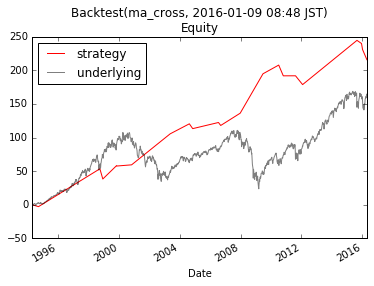

In [15]:
bt.plot_equity()